###Importing Libraries

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [125]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [126]:
df.shape

(13320, 9)

In [127]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

####Removing unnecessary columns

In [128]:
df.drop(['balcony', 'availability', 'area_type', 'society'], axis = 1, inplace = True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [129]:
df.isnull().any()

location       True
size           True
total_sqft    False
bath           True
price         False
dtype: bool

In [130]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [131]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [132]:
df.shape

(13246, 5)

In [133]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [134]:
df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))
df.head()

<ipython-input-134-879790939094>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [135]:
df.drop(['size'], inplace = True, axis = 1)
df.head()

<ipython-input-135-1b064b899f82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['size'], inplace = True, axis = 1)


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [136]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [137]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [138]:
def convert_sqft(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [139]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [140]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [141]:
df['location'] = df['location'].apply(lambda x : x.strip())
location_stats = df.groupby('location')['location'].count().sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [142]:
loc_less_than_10 = location_stats[location_stats<=10]
loc_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [143]:
df['location'] = df['location'].apply(lambda x: 'Others' if x in loc_less_than_10 else x)
len(df['location'].unique())

242

In [144]:
df.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,Others,1020.0,6.0,370.00,6,36274.509804


In [145]:
df.shape

(13246, 6)

In [146]:
df = df[~(df['total_sqft']/df['bhk']<300)]
df.shape

(12502, 6)

In [147]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<Axes: >

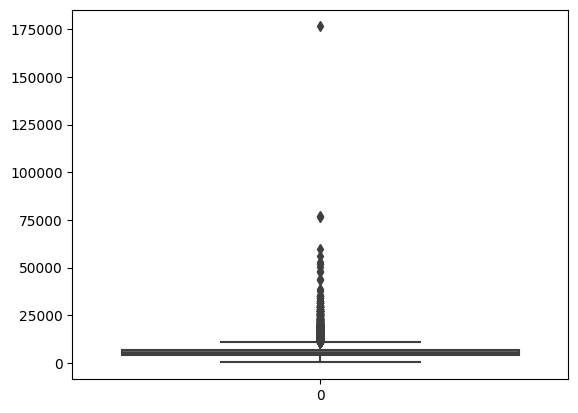

In [148]:
sns.boxplot(df['price_per_sqft'])

In [149]:
q1 = df.price_per_sqft.quantile(0.25)
q3 = df.price_per_sqft.quantile(0.75)
print(q1)
print(q3)

4210.526315789473
6916.666666666667


In [150]:
IQR = q3-q1
IQR

2706.1403508771937

In [151]:
upper_limit = q3 + IQR
lower_limit = q1 - IQR
print(upper_limit)
print(lower_limit)

9622.80701754386
1504.3859649122796


In [152]:
df = df[df['price_per_sqft'] > lower_limit]
df = df[df['price_per_sqft'] < upper_limit]

In [153]:
df.shape

(11083, 6)

<Axes: >

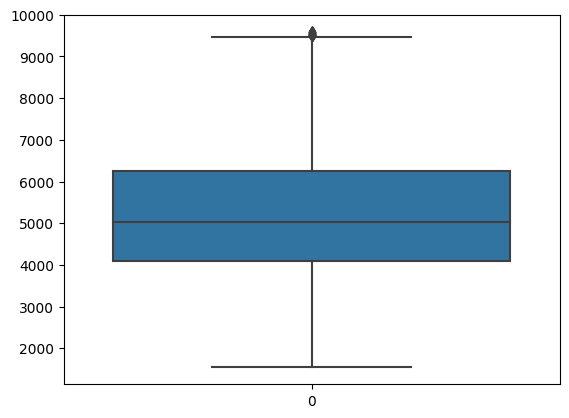

In [154]:
sns.boxplot(df['price_per_sqft'])

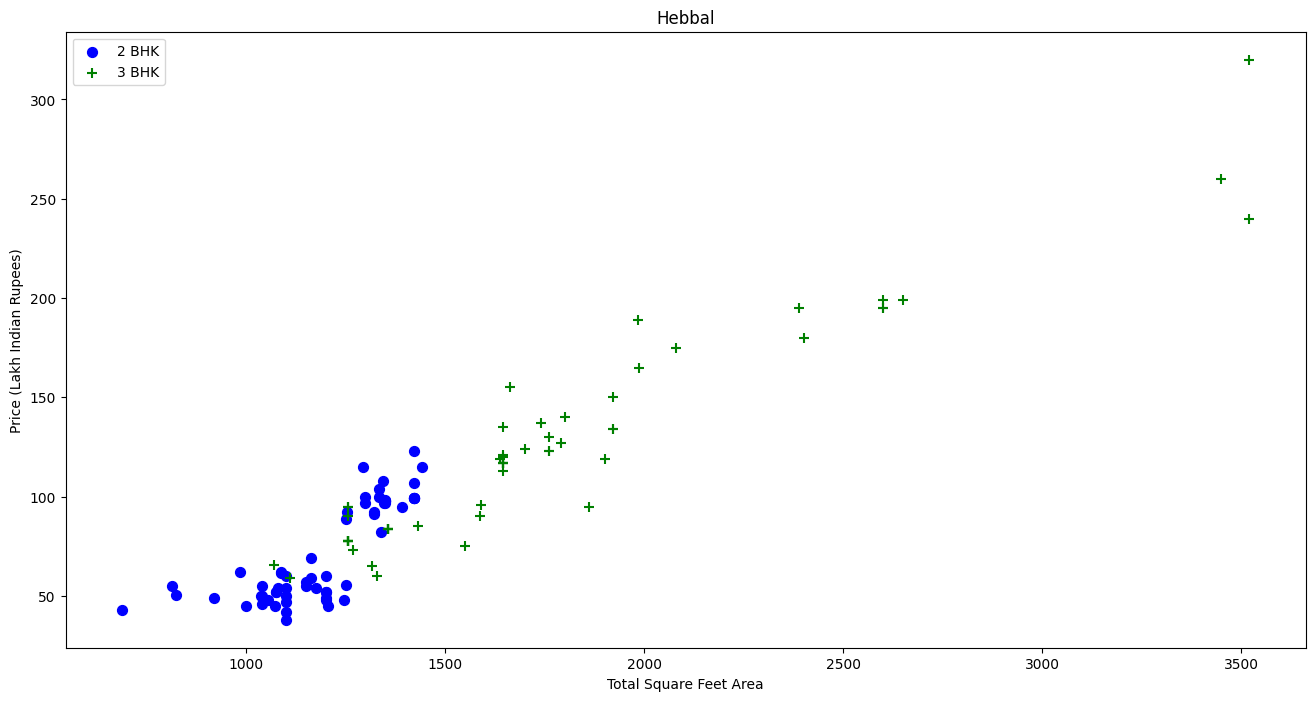

In [155]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.subplots(figsize=(16,8))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df,"Hebbal")

In [156]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(8018, 6)

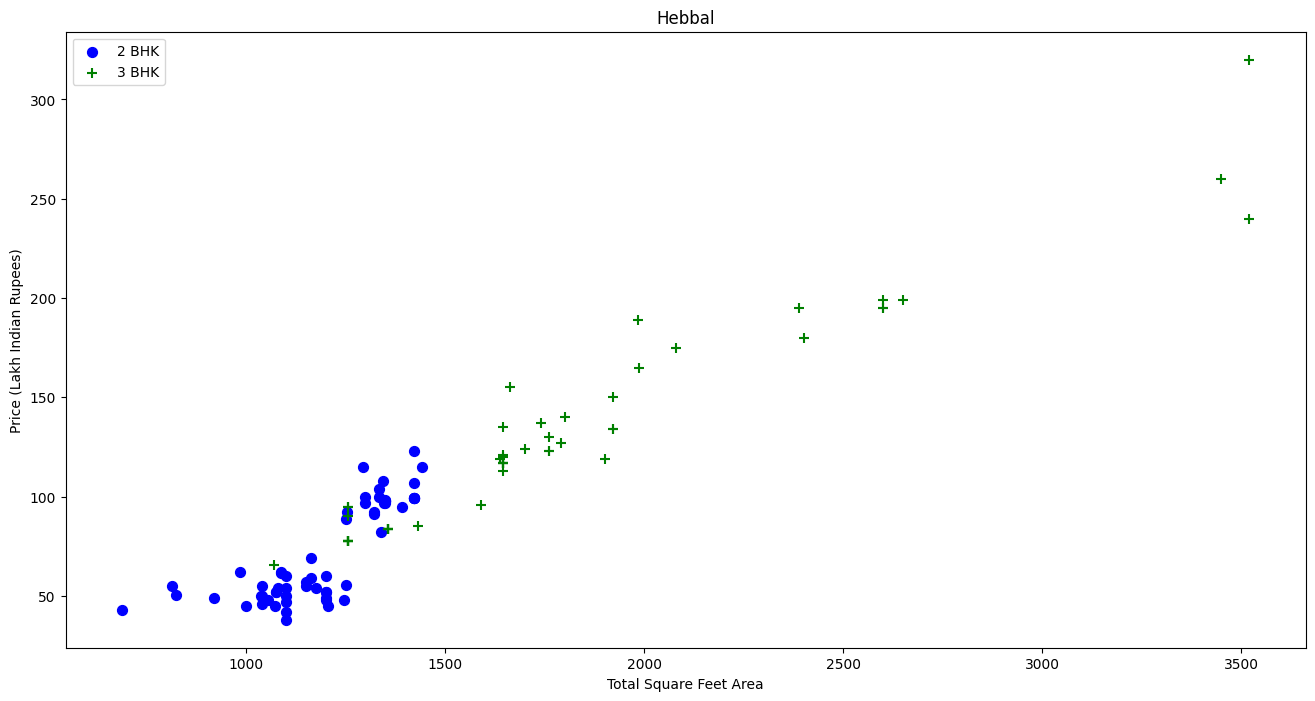

In [157]:
plot_scatter_chart(df,"Hebbal")

(array([  24.,  315.,  824., 1214., 1665., 1477., 1095.,  720.,  430.,
         254.]),
 array([1578.94736842, 2381.05263158, 3183.15789474, 3985.26315789,
        4787.36842105, 5589.47368421, 6391.57894737, 7193.68421053,
        7995.78947368, 8797.89473684, 9600.        ]),
 <BarContainer object of 10 artists>)

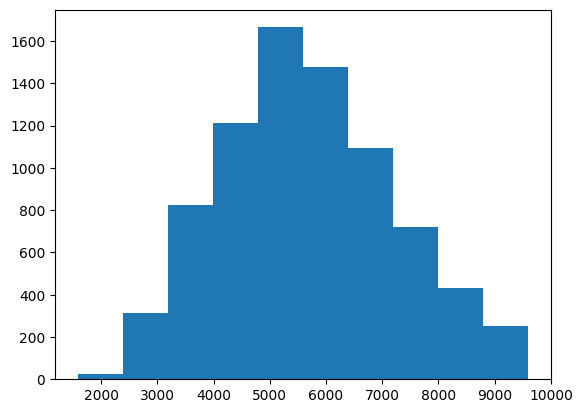

In [158]:
plt.hist(df.price_per_sqft)

In [159]:
df = df[df.bath <= df.bhk+2]
df.shape

(8014, 6)

In [160]:
df.drop(['price_per_sqft'], axis = 1, inplace = True)
df.head()

<ipython-input-160-369ab563fc6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['price_per_sqft'], axis = 1, inplace = True)


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
6,Old Airport Road,2732.0,4.0,204.00,4


In [161]:
dummies = pd.get_dummies(df.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
df = pd.concat([df, dummies.drop(['Others'], axis = 1)], axis = 1)
df.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Old Airport Road,2732.0,4.0,204.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
df.drop(['location'], axis = 1, inplace = True)

In [164]:
df.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8014 entries, 0 to 13319
Columns: 244 entries, total_sqft to Yeshwanthpur
dtypes: float64(3), int64(1), uint8(240)
memory usage: 2.1 MB


In [166]:
x = df.drop(['price'], axis = 1)
y = df.price

In [167]:
col = x.columns

In [168]:
x = x.values
y = y.values

In [169]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)


In [170]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [171]:
lr.fit(x_train, y_train)

LinearRegression()

In [172]:
lr.score(x_test, y_test)

0.9037965027845007

In [173]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [174]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [175]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 10)
cross_val_score(lr, x, y, cv = cv)

array([ 9.03796503e-01,  8.77239948e-01,  8.56981639e-01, -1.84831320e+15,
        9.33731586e-01])

In [176]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [177]:
def find_best_model(x,y):
  algos = {
   'linear_regression' : {
      'model' : LinearRegression(),
      'params' : {\
          'copy_X': [True, False],
          'fit_intercept': [True, False],
          'positive' : [True, False],
          'n_jobs' : [None,1,2]
      }
   },
   'lasso' : {
      'model' : Lasso(),
      'params' : {
          'alpha' : [1,2],
          'selection' : ['cyclic', 'random']
      }
   },
   'decision_tree' : {
      'model' : DecisionTreeRegressor(),
      'params' : {
          'criterion' : ['poisson', 'squared_error', 'absolute_error', 'friedman_mse'],
          'splitter' : ['best', 'random']
      }
   }

  }

  scores = []
  cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

  for algo_name, config in algos.items() :
    gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
    gs.fit(x,y)
    scores.append({
        'model' : algo_name,
        'best_scores' : gs.best_score_,
        'best_params' : gs.best_params_
    })

  return pd.DataFrame(scores, columns = ['model', 'best_scores', 'best_params'])

In [178]:
find_best_model(x,y)

,model,best_scores,best_params
0,linear_regression,0.859731,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.837231,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.832250,"{'criterion': 'absolute_error', 'splitter': 'r..."


In [179]:
def predict_price(loc, sqft, bath, bhk):
  loc_index = np.where(col == loc)[0][0]

  X = np.zeros(len(col))
  X[0] = sqft
  X[1] = bath
  X[2] = bhk
  if loc_index>=0:
    X[loc_index] = 1

  return lr.predict([X])[0]

In [180]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

74.97765747797484

In [181]:
predict_price('Indira Nagar', 1000, 2, 2)

96.66612882822916

In [182]:
predict_price('Old Airport Road', 2732, 4, 4)

200.07139534131113

In [183]:
import pickle
with open('banglore_real_estate_model.pickle', 'wb') as f:
  pickle.dump(lr,f)

In [184]:
import json
columns = {
    'data_columns' : [c.lower() for c in col]
}
with open('columns.json', 'w') as f:
  f.write(json.dumps(columns))